https://www.youtube.com/watch?v=6UxVC27n01M

# Get request

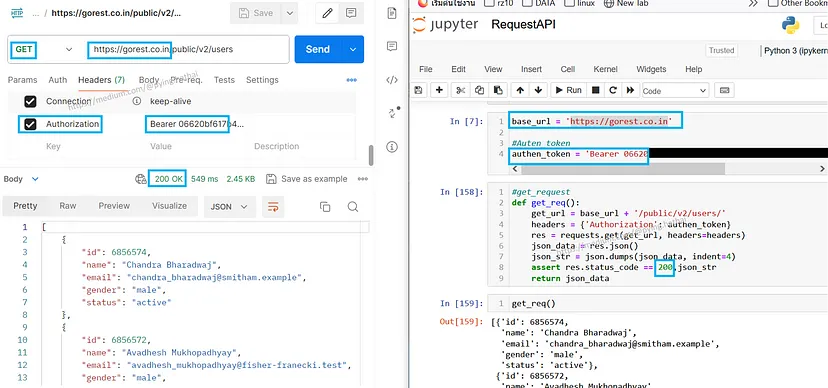 

# Post request

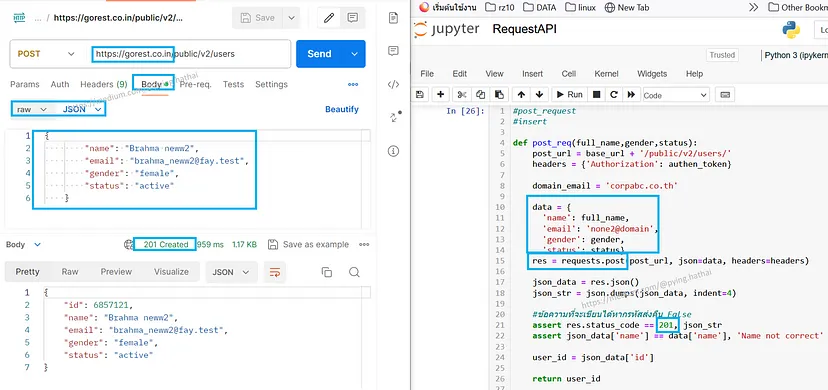# 

# Put Request

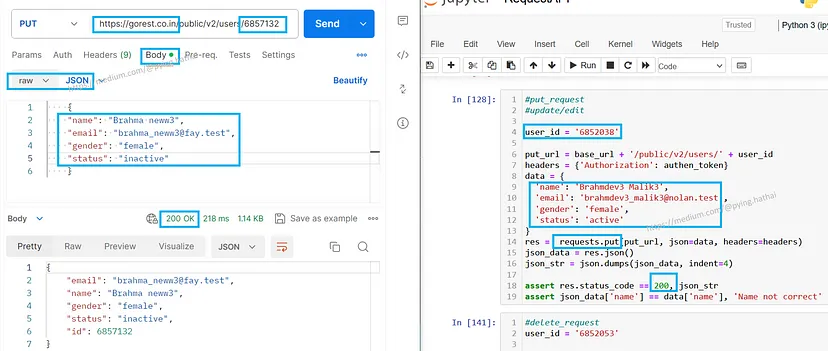

# Delete

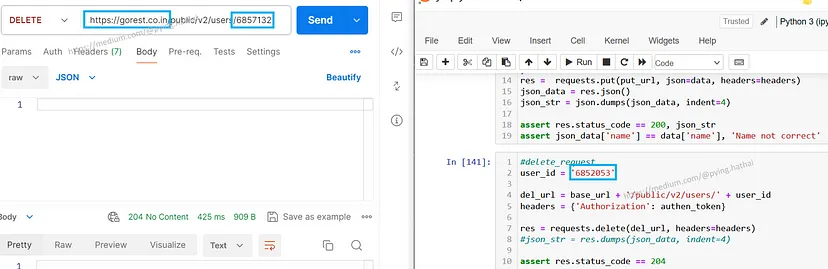

# Diagram

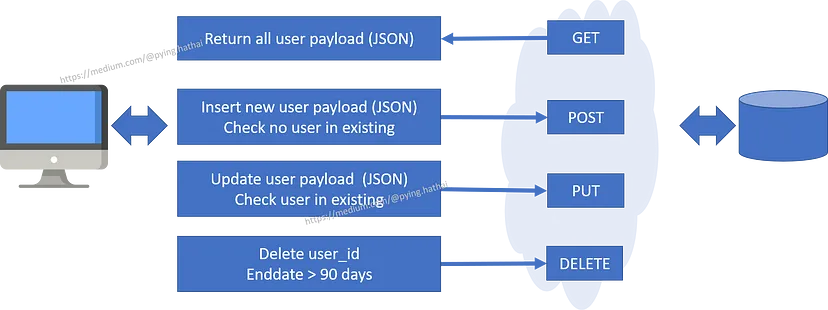

In [2]:
!pip install requests

In [3]:
import requests
import random
import json
import string

import datetime
#from datetime import datetime

In [4]:
base_url = 'https://gorest.co.in'

#Auten_token
authen_token = 'Bearer 06620bf617b485ea172f1212162ce2380f5a7718d08be099a5037b2817e6580e'

In [5]:
#get_request
def get_req():
    get_url = base_url + '/public/v2/users/'
    headers = {'Authorization': authen_token}
    res = requests.get(get_url, headers=headers)  #respone code<Response [200]>
    json_data = res.json()                        #ข้อมูลในรูปแบบ jason
    
    json_str = json.dumps(json_data, indent=4)    #ข้อความเมื่อ error
    assert res.status_code == 200,json_str        #ถ้าไม่เท่ากับ 200, แสดงข้อความ error
    
    return json_data

In [6]:
#get_request 1 user
#ex. get_req1('6957476')

def get_req1(ip_user_id):
    get_url = base_url + '/public/v2/users/' + ip_user_id
    headers = {'Authorization': authen_token}
    res = requests.get(get_url, headers=headers)  #respone code<Response [200]>
    json_data = res.json()                        #ข้อมูลในรูปแบบ jason
    
    json_str = json.dumps(json_data, indent=4)    #ข้อความเมื่อ error
    assert res.status_code == 200,json_str        #ถ้าไม่เท่ากับ 200, แสดงข้อความ error
    
    return json_data

In [7]:
#post_request
#insert

def post_req(ip_fullname,ip_gender,ip_email,ip_status):
    post_url = base_url + '/public/v2/users/'
    headers = {'Authorization': authen_token}
        
    data = {
      'name': ip_fullname,
      'email': ip_email,
      'gender': ip_gender,
      'status': ip_status}
    res = requests.post(post_url, json=data, headers=headers) #คืนค่า code success หรือ unsuccess
    json_data = res.json()     #คืนค่าข้อมูลที่ update แล้ว
    
    json_str = json.dumps(json_data, indent=4)
    #ถ้าไม่เท่ากับ 201, แสดงข้อความ error
    assert res.status_code == 201, json_str
    assert json_data['name'] == data['name'], 'Name not correct'

    user_id = json_data['id']
    
    return user_id


In [9]:
#put_request
#update/edit

def put_req(user_id,new_name,new_email,new_gender,new_status):
    put_url = base_url + '/public/v2/users/' + user_id
    headers = {'Authorization': authen_token}
    data = {
      'name': new_name,
      'email': new_email,
      'gender': new_gender,
      'status': new_status
    }
    res =  requests.put(put_url, json=data, headers=headers)
    json_data = res.json()
    
    json_str = json.dumps(json_data, indent=4)
    assert res.status_code == 200, json_str
    assert json_data['name'] == data['name'], 'Name not correct'
    
    user_id = json_data['id']
    
    return user_id 
    

In [22]:
#delete_request
#user_id = '6852053'

def del_req(user_id):
    del_url = base_url + '/public/v2/users/' + user_id
    headers = {'Authorization': authen_token}

    res = requests.delete(del_url, headers=headers)
    
    #json_str = res.dumps(json_data, indent=4)
    assert res.status_code == 204
    
    return res.status_code

In [11]:
def gen_email(ip_fullname):
    domain_email = '@corpabc.co.th'
    name_list = ip_fullname.split(' ')[0],ip_fullname.split(' ')[1][0]
    ip_email = '.'.join(name_list) + domain_email
    return ip_email
    

In [12]:
def check_status(ip_startdate,ip_enddate):
    present = datetime.datetime.today()
    ip_startdate2 = datetime.datetime.strptime(ip_startdate, "%d-%m-%Y")
    ip_enddate2 = datetime.datetime.strptime(ip_enddate, "%d-%m-%Y")
    
    #วันปัจจุบัน มากกว่าเท่ากับ ถ้าวันเริ่มงาน - True(active)
    status_start_boolean = present.date() >= ip_startdate2.date()  
    
    #สิ้นสุดงานไปแล้ว วันปัจจุบัน น้อยกว่า วันสิ้นสุดงาน - True(active)
    status_end_boolean = present.date() < ip_enddate2.date()    

    if present.date() >= ip_startdate2.date() and present.date() < ip_enddate2.date():
        status = 'active'
    else:
        status = 'inactive'

    return status

In [13]:
def find_edited_id(ip_fullname):
    #หา user_id ที่จะแก้ จาก ชื่อเดิม 
    all_employee_data = get_req()
    employee_list = []
    for i in all_employee_data:
        #print(i['name'])
        if i['name'] == ip_fullname:
            employee_IsContain = 1  #มี userอยู่แล้ว flag 1
            ip_user_id = i['id']
        else:
            employee_IsContain = 0  #ไม่มี user ให้ flag 0
        employee_list.append(employee_IsContain)
    print(ip_user_id)
    
    return ip_user_id

# Input

In [16]:
ip_fullname = input('Enter your name: ')
ip_gender = input('Enter your gender: ')
ip_startdate = input('Enter your startdate(dd-mm-YYYY): ')
ip_enddate = input('Enter your enddate(dd-mm-YYYY): ')

Enter your name: Anny Manana
Enter your gender: female
Enter your startdate(dd-mm-YYYY): 01-01-2024
Enter your enddate(dd-mm-YYYY): 31-01-2024


# 1. Main Post
1. ตรวจสอบว่ามี user สร้างอยู่แล้วหรือไม่
2. ถ้าไม่มีให้ insert 

In [17]:
#main post

ip_email = gen_email(ip_fullname)
print(ip_email)
ip_status = check_status(ip_startdate,ip_enddate)
print(ip_status)

all_employee_data = get_req()
employee_IsContain_list = []
for i in all_employee_data:
    print(i['email'])
    if i['email'] == ip_email:
        employee_IsContain = 1  #มี userอยู่แล้ว flag 1
    else:
        employee_IsContain = 0  #ไม่มี user ให้ flag 0
    #print(employee_IsContain)
    employee_IsContain_list.append(employee_IsContain)

if sum(employee_IsContain_list) == 0:
    new_user_id = post_req(ip_fullname,ip_gender,ip_email,ip_status)
    print(new_user_id)
else:
    print('no user insert')
    

Anny.M@corpabc.co.th
inactive
abbott_chandani_md@mcdermott-heidenreich.example
iyengar_devi@gerlach.test
aasha_ahuja_cpa@douglas-zboncak.test
bhat_jahnu@waelchi-heidenreich.example
adhiraj_talwar@koelpin.test
aaratrika_talwar@koepp.test
varrier_arnesh@grady-bernier.test
prajapat_v_dhara@harvey.example
anasooya_tagore@stiedemann-gleichner.example
talwar_charuvrat@harris.test
6962393


In [18]:
get_req1('6962393')

{'id': 6962393,
 'name': 'Anny Manana',
 'email': 'Anny.M@corpabc.co.th',
 'gender': 'female',
 'status': 'inactive'}

# 2. Main put (แก้ไขชื่อเดิม)
1. ตรวจสอบว่าชื่อเดิมมี user id อะไร
2. put request ชื่อนั้นเพื่อแก้ไขชื่อ

In [19]:
ip_old_fullname = input('Enter your old name: ')
ip_new_fullname = input('Enter your new name: ')

Enter your old name: Anny Manana
Enter your new name: Annita Manana


In [20]:
#main put 
#change name

edited_userid = find_edited_id(ip_old_fullname)

user_id = str(edited_userid)
ip_new_email = gen_email(ip_new_fullname)
ip_gender = get_req1(user_id)['gender']
ip_status = get_req1(user_id)['status']

new_info = put_req(user_id,ip_new_fullname,ip_new_email,ip_gender,ip_status)
print(new_info)


6962393
6962393


In [21]:
get_req1('6962393')

{'id': 6962393,
 'name': 'Annita Manana',
 'email': 'Annita.M@corpabc.co.th',
 'gender': 'female',
 'status': 'inactive'}

# 3. Main delete (ลบเมื่อ end date > 90 days)
1. ตรวจสอบว่า มากกว่า 90 วันไหม
2. ลบ userid นั้น

In [36]:
from datetime import datetime

today = date.today()

# dates in string format
str_d1 = ip_enddate
str_d2 = today.strftime("%d-%m-%Y")

# convert string to date object
d1 = datetime.strptime(str_d1,"%d-%m-%Y")
d2 = datetime.strptime(str_d2, "%d-%m-%Y")

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')

Difference is 134 days


In [50]:
#main delete
#delete when enddate > 90days

user_id = '6962393'

if delta.days > 90:
    del_req(user_id)

In [51]:
get_req1('6962393')

AssertionError: {
    "message": "Resource not found"
}

In [23]:
#main put 
#change status
#end date <= ปัจจุบัน เปลี่ยน status เป็น inactive
 
ip_userid = find_edited_id(ip_fullname)
ip_status = check_status(ip_startdate,ip_enddate)
print(ip_status)

user_id = str(ip_user_id)
ip_new_email = gen_email(ip_new_fullname)
ip_gender = get_req1(user_id)['gender']
ip_status = get_req1(user_id)['status']

if ip_status == 'inactive':
    new_info = put_req(user_id,ip_new_fullname,ip_new_email,ip_gender,ip_status)
    print(new_info)
else:
    print('no changed')


UnboundLocalError: local variable 'ip_user_id' referenced before assignment